In [1]:
options(digits = 4,
        xtable.caption.placement="bottom",
        xtable.latex.environments="center",
        xtable.booktabs=TRUE,
        xtable.include.rownames=FALSE,
        sanitize.text.function=function(x){x},
        xtable.comment=FALSE)

libs <- c("ggplot2","knitr","plyr", "dplyr","magrittr","Matrix","xtable","printr")
result <-plyr::laply(.data=libs,.fun=require,character.only=TRUE,quietly=TRUE,warn.conflicts=FALSE)

# Données synthétiques 


In [2]:
n <- 100 
p <- 10
sigma <- 1

In [3]:
Z <- matrix(rnorm(n*p), ncol=p)
svdZ <- svd(Z)

In [4]:
theta <- rexp(p)
eps <- rnorm(n)
Y <- Z %*% theta + eps

In [5]:
thetahat  <- solve(a=t(Z)%*%Z, b=t(Z)%*% Y)
Yhat <- Z %*% thetahat
residuals <- Y - Yhat

In [6]:
t(residuals) %*% Z %>% xtable(caption="Produit scalaire entre résidus et colonnes du design")

1          2          3          4         5         6         7        
1 -6.661e-16 -4.613e-14 -1.288e-14 2.109e-15 1.665e-14 2.776e-15 4.249e-14
  8          9          10        
1 -3.553e-15 -8.052e-14 -2.562e-14

In [7]:
cov(residuals,Yhat)

[,1]  
[1,] 0.1494

In [8]:
eigen(t(Z)%*%Z)$values  %>% 
  t %>% 
  as.data.frame %>% 
  xtable(caption="spectre de la matrice de Gram")

V1  V2    V3    V4    V5    V6    V7    V8    V9    V10  
1 183 137.1 121.4 102.7 95.09 89.14 81.44 75.47 62.34 46.07

Analyse des residus. Si nous avons bien affaire à un modèle linéiare gaussien, 
on attend 
$$
   \widehat{Y} = Y + \sigma(H-\text{Id}) \epsilon
$$

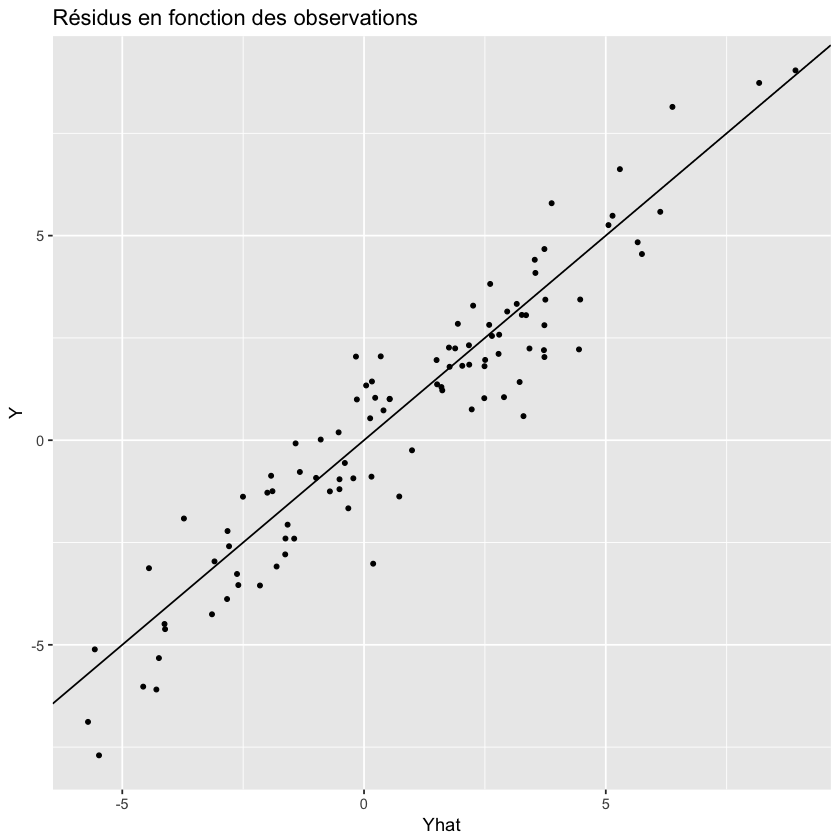

In [11]:
ggplot2::qplot(x=Yhat,y=Y,geom="point",size=I(1))+
  ggplot2::geom_abline(intercept=0,slope=1)+
  ggtitle("Résidus en fonction des observations")